In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import random 
import pandas as pd

output = 'figures/'

In [2]:
def sst(T, h):
    return (R*T + gama*h-epsilon*(h+b*T)**3 + gama* xi)
def thermo(T,h):
    return (-r*h -alpha*b*T-alpha*xi)
def rungeKutta(T,h):
    "Apply Runge Kutta Formulas to find next value of T and h"
    k1 =  sst(T, h)
    kk1 =  thermo(T, h)
    
    k2 =  sst(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    kk2 = thermo(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    
    k3 =  sst(T + dt*0.5 * k2, h + dt*0.5 *kk2  )
    kk3 = thermo(T + dt*0.5 * k2, h + dt*0.5 * kk2 )
    
    k4 = sst(T + dt*k3, h + dt*kk3 )
    kk4 = thermo(T + dt*k3, h + dt*kk3 )
    # Update next value of T
    T = T + (1.0 / 6.0)*dt*(k1 + 2 * k2 + 2 * k3 + k4)
    # Update next value of h
    h = h + (1.0 / 6.0)*dt*(kk1 + 2 * kk2 + 2 * kk3 + kk4)
    return T,h

# Task A    μ = 2/3

In [3]:
# initial
T0=1.125/7.5
h0=0
T= T0
h = h0

### time space
time =120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years

###parameters
b0=2.5 # a high-end value of the coupling parameter.
gama=0.75 #specifies the feedback of the thermocline gradient on the SST gradient.
c=1  #damping rate of SST anomalies.
r = 0.25  #represents damping of the upper ocean heat content.
alpha = 0.125 # relates enhanced easterly wind stress to the recharge of ocean heat content.
epsilon=0   # no nonlinearity
xi=0  # no forcing 
mu=2/3
b=b0*mu
R=gama * b - c

Text(0.5, 1.0, 'Harmonic oscillation')

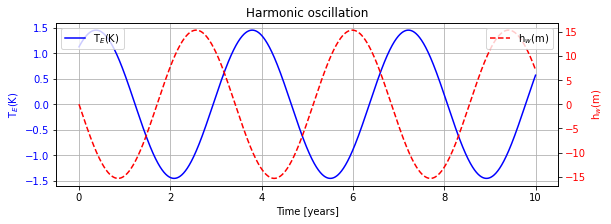

In [4]:
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Harmonic oscillation")

# Task B mu >2/3 and mu < 2/3

In [5]:
mu=0.7
b=b0*mu
R=gama * b - c

Text(0.5, 1.0, 'Exploding oscillation')

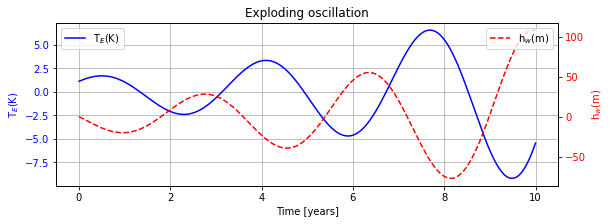

In [6]:
T_arr, h_arr =[],[]
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Exploding oscillation")

In [7]:
(R-r)/2

0.03125

In [8]:
mu=0.6
b=b0*mu
R=gama * b - c

Text(0.5, 1.0, 'Damping oscillation')

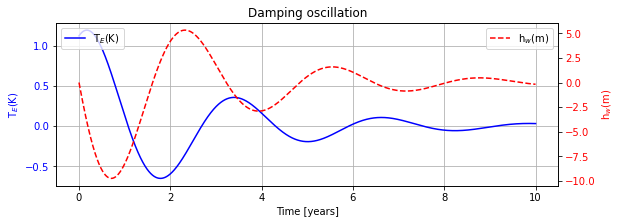

In [9]:
T_arr, h_arr =[],[]
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Damping oscillation")

# Task C    Turn on nonlinearity by setting ε = 0.1  mu=2/3

Text(0.5, 1.0, 'Adding nonlinearity for an unstable oscillation')

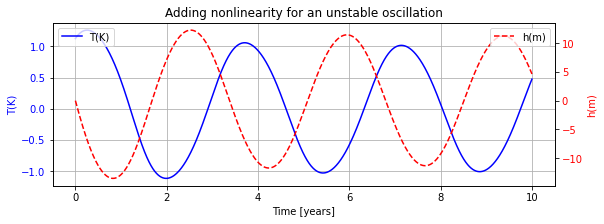

In [10]:
epsilon=1.2
mu=0.7
b=b0*mu
R=gama * b - c

T_arr, h_arr =[],[]
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Adding nonlinearity for an unstable oscillation")

# Task D annual forcing

Text(0.5, 1.0, 'Adding annual cycle wind forcing')

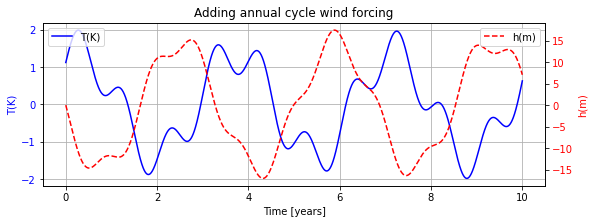

In [11]:
T=T0
h=h0
mu=2/3
b=b0*mu
R=gama * b - c
epsilon=0
f_ann=0.1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]  
for i in range(0, n ):
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Adding annual cycle wind forcing")

# Task E Random forcing

Text(0.5, 1.0, 'Stochastic forcing (white noise)')

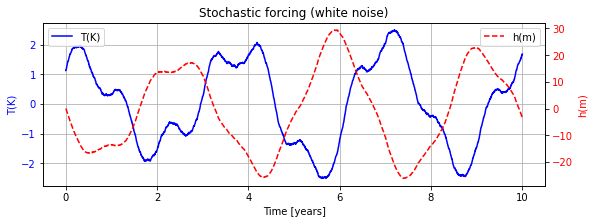

In [12]:
import random
T=T0
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.2
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]
for i in range(0, n ):
    w=(2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Stochastic forcing (white noise)")

Text(0.5, 1.0, 'a simulated 70-year time series of T with white noise')

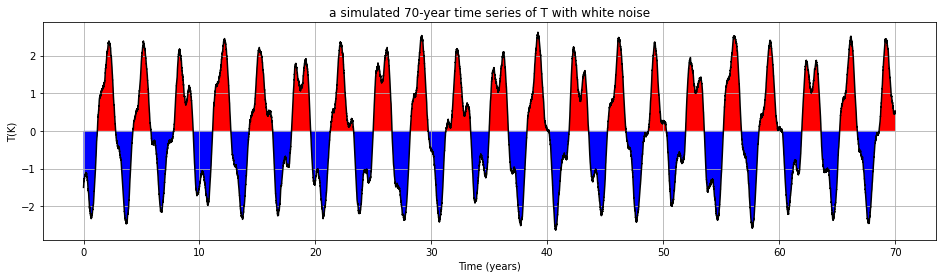

In [13]:
fig= plt.figure(figsize=(16,4))
time =120*7*30/60
n = int(time/dt)
xlim = np.linspace(0,time,n)
T=-1.5/7.5
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.2
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]

for i in range(0, n ):
    w=(2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T(K)",color='k')
x=xlim*2/12
y2=np.array(T_arr)*7.5
y1=0*y2
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
#plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")

plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T(K)")
plt.title("a simulated 70-year time series of T with white noise")

# implement red noise

In [14]:


mu = 0.75
b=b0*mu
R=gama * b - c
epsilon = 0.6
f_ann = 0.1
f_ran = 0.2

# time parameters
time =120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)

T=T0
h=h0
tau=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]

#white noise
r=0.33#correlation coefficient
s = np.sqrt(1 - r**2)

w=np.zeros(n)
w[0]=(2*random.random()-1)

for i in range(1,n):
    w[i]=(r*w[i-1]+ s*(2*random.random()-1))
    xi = f_ann*np.cos(2*np.pi*(i+1)/tau/60) + f_ran*w[i] #  x(j+1) = r*x(j) + s*w(j+1);
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)

Text(0.5, 1.0, 'Stochastic forcing (red noise)')

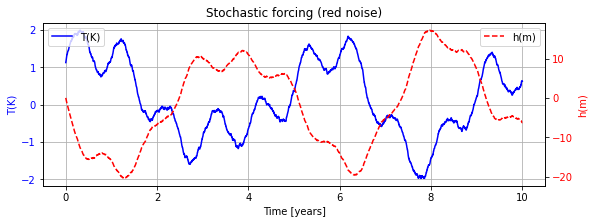

In [15]:
xlim = np.linspace(0,time,n-1)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)
ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Stochastic forcing (red noise)")

Text(0.5, 1.0, 'a simulated 70-year time series of T with red noise')

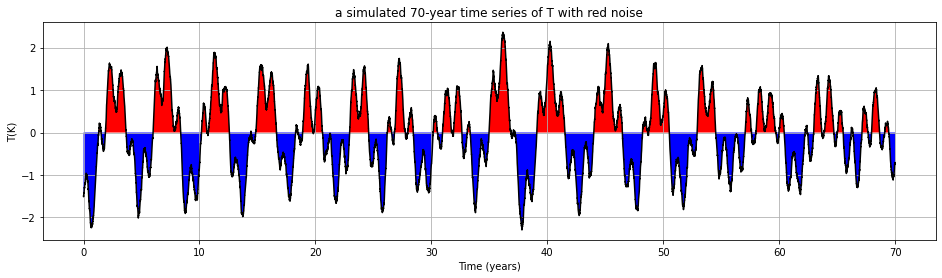

In [16]:
fig= plt.figure(figsize=(16,4))
time =120*7*30/60
n = int(time/dt)
xlim = np.linspace(0,time,n-1)

T=-1.5/7.5
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.2
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]
r=0.33#correlation coefficient
s = np.sqrt(1 - r**2)
w=np.zeros(n)
w[0]=(2*random.random()-1)

for i in range(1,n):
    w[i]=(r*w[i-1]+ s*(2*random.random()-1))
    xi = f_ann*np.cos(2*np.pi*(i+1)/tau/60) + f_ran*w[i]
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
      
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T(K)",color='k')
x=xlim*2/12
y2=np.array(T_arr)*7.5
y1=0*y2
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
#plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")
plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T(K)")
plt.title("a simulated 70-year time series of T with red noise")

# ensemble

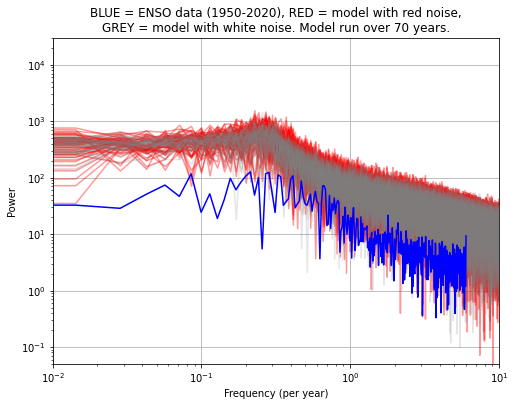

In [40]:
T=T0
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.1
tao=12*30*60 # 12 months.  must divide this by 2 months to non-dimensional

# time = 120*7*30/60  # total time 420 months non-dimensionalise by 2 months
time = 70*12/2 # time = 70 years
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
T_arr, h_arr =[],[]
n = int(time/dt)# total number of time steps
xlim = np.linspace(0,time,n)

r=0.33#correlation coefficient
s = np.sqrt(1 - r**2)
w=np.zeros(n)
w[0]=(2*random.random()-1)

fig = plt.figure(figsize=(8,6))

for j in range(51):
    T_arr, h_arr =[],[]
    T=np.random.random_sample()  # range from 0 to 7.5K
    h=np.random.random_sample()
    
    for i in range(0, n ):        
        w[i]=(r*w[i-1]+ s*(2*random.random()-1))
        xi = f_ann*np.cos(2*np.pi*(i+1)/tao/60) + f_ran*w[i]   #annual forcing + red noise
        T_arr.append(T)
        h_arr.append(h)
        T,h = rungeKutta(T,h)

    data=np.array(T_arr)*7.5
    ft = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(data), 1) # Get frequency axis from the time axis
    mags = abs(ft)
    plt.grid()
    plt.loglog(freqs*360, mags, color="red",alpha=0.4)
    
for j in range(51):
    T_arr, h_arr =[],[]
    T=np.random.random_sample()  # range from 0 to 7.5K
    h=np.random.random_sample()

    for i in range(0, n ):
        w=(2*random.random()-1)
        xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w #annual forcing + white noise

        T_arr.append(T)
        h_arr.append(h)
        T,h = rungeKutta(T,h)
        
    data=np.array(T_arr)*7.5
    ft = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(data), 1) # Get frequency axis from the time axis
    mags = abs(ft)
    plt.grid()
    plt.loglog(freqs*360, mags,color="gray",alpha=0.2)

    
nino3=pd.read_csv('nino34.csv', sep=',',header=None)
months=np.tile(range(12),len(nino3))
years=np.repeat(nino3.iloc[:, 0].values,12)
data=nino3.iloc[:,1:].values.flatten()
d = {'years':years,'months':months,'data':data}
df = pd.DataFrame(data=d)
df_index=pd.date_range(start='1870-01-01',freq='MS',periods=1812)
df.set_index(df_index,inplace=True)
df=df['1950':'2020-5']
x=df.data.values
ft = np.fft.rfft(x)
freqs = np.fft.rfftfreq(len(x), 1) # Get frequency axis from the time axis
mags = abs(ft) 
plt.grid()
plt.loglog(freqs*12, mags,color='b',label='real data')
plt.ylabel('Power')
plt.xlabel('Frequency (per year)')
plt.xlim(1e-2,1e1)
plt.ylim(5e-2,3e4)
plt.title('BLUE = ENSO data (1950-2020), RED = model with red noise,\nGREY = model with white noise. Model run over 70 years.')
plt.savefig(output + 'ENSO_FourierSpectrum')

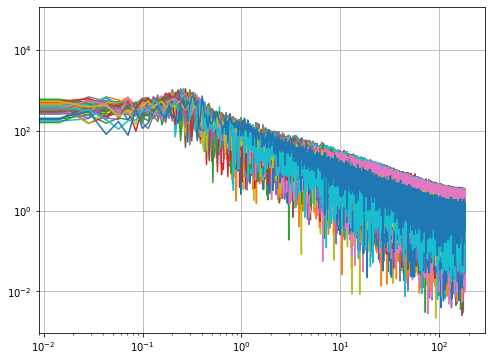

In [72]:
import random
T=T0
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.1
tao=12*30*60 # 12 months.  must divide this by 2 months to non-dimensional

time =120*7*30/60  #total time 240 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
T_arr, h_arr =[],[]
n = int(time/dt)# total number of time steps
xlim = np.linspace(0,time,n)


# r=0.33#correlation coefficient
# s = np.sqrt(1 - r**2)
# w=np.zeros(n)
# w[0]=(2*random.random()-1)

fig= plt.figure(figsize=(8,6))
for j in range(51):
    T_arr, h_arr =[],[]
    T=np.random.random_sample()  # range from 0 to 7.5K
    h=np.random.random_sample()
    
    for i in range(0, n ):
        w=(2*random.random()-1)
        xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w  #annual forcing + white noise
        

        T_arr.append(T)
        h_arr.append(h)
        T,h = rungeKutta(T,h)
        
#     plt.plot(xlim*2/12, np.array(T_arr)*7.5)
#     plt.grid()
    data=np.array(T_arr)*7.5
    ft = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(data), 1) # Get frequency axis from the time axis
    mags = abs(ft)
    plt.grid()
    plt.loglog(freqs*360, mags)

In [57]:
np.random.random_sample()

0.33627873504634986

In [63]:
(2*random.random()-1)

-0.08138773014885037